In [1]:
from __future__ import print_function
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
import pandas as pd
import numpy as np
import pickle
from sklearn.model_selection import train_test_split

Using TensorFlow backend.


# Tratamiento dataset

In [2]:
kitchenware = pickle.load(open('../dataset/dataset.pkl', 'rb'))
kitchenware.values.shape

(28448, 3)

In [3]:
kitchenware.head()

,label,image,path
0,rodillo,"[[[200, 207, 204], [241, 248, 245], [147, 153,...",../dataset/images/rodillo/images_red/rodillo_3...
1,rodillo,"[[[29, 34, 33], [38, 42, 43], [177, 178, 182],...",../dataset/images/rodillo/images_red/rodillo_7...
2,rodillo,"[[[95, 132, 160], [99, 136, 164], [108, 141, 1...",../dataset/images/rodillo/images_red/rodillo85...
3,rodillo,"[[[77, 80, 78], [80, 83, 81], [90, 90, 90], [8...",../dataset/images/rodillo/images_red/rodillo_2...
4,rodillo,"[[[94, 98, 99], [97, 101, 102], [98, 102, 103]...",../dataset/images/rodillo/images_red/rodillo_1...


Convertimos las etiquetas en binario para que el modelo nos devuelva el porcentaje de predicción para cada objeto

In [4]:
dummies = pd.get_dummies(kitchenware['label'])

In [5]:
dummies.head()

,cuchara,cuchillo,cuenco,hervidor,otro,pelador,rodillo,tenedor,tostadora,vaso
0,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,1,0,0,0
2,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,0,1,0,0,0
4,0,0,0,0,0,0,1,0,0,0


In [6]:
dummies['gt'] = dummies.apply(lambda x: pd.Series([x.values]), axis=1)

Convertimos en vector

In [7]:
dummies.head()

,cuchara,cuchillo,cuenco,hervidor,otro,pelador,rodillo,tenedor,tostadora,vaso,gt
0,0,0,0,0,0,0,1,0,0,0,"[0, 0, 0, 0, 0, 0, 1, 0, 0, 0]"
1,0,0,0,0,0,0,1,0,0,0,"[0, 0, 0, 0, 0, 0, 1, 0, 0, 0]"
2,0,0,0,0,0,0,1,0,0,0,"[0, 0, 0, 0, 0, 0, 1, 0, 0, 0]"
3,0,0,0,0,0,0,1,0,0,0,"[0, 0, 0, 0, 0, 0, 1, 0, 0, 0]"
4,0,0,0,0,0,0,1,0,0,0,"[0, 0, 0, 0, 0, 0, 1, 0, 0, 0]"


# Entrenamiento del modelo

Asignamos las features a la X

In [8]:
X = np.stack(kitchenware['image'])
y = np.stack(dummies['gt'])

In [11]:
print(X.shape)
print(y.shape)

(28448, 64, 64, 3)
(28448, 10)


Dividimos los datos en entrenamiento y test

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [16]:
print(X_test.shape)

(5690, 64, 64, 3)


Preparación del dataset para el entreno con la red neuronal

In [11]:
num_classes = 10
img_rows = 64
img_cols = 64

# Incoming data is in uint8. Cast the input data images to be floats in range [0.0-1.0]  
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

print('x_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

# convert class vectors to binary class matrices

y_train = keras.utils.to_categorical(y_train, num_classes, dtype='float32')
y_test = keras.utils.to_categorical(y_test, num_classes, dtype='float32')

x_train shape: (22758, 64, 64, 3)
22758 train samples
5690 test samples


Modelo a aplicar

In [13]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(64, 64, 3)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

Entrenamiento del modelo

In [14]:
# Fit the NN
batch_size = 20
epochs = 10

model.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test, y_test))

Train on 22758 samples, validate on 5690 samples
Epoch 1/10
22758/22758 [==============================] - 464s 20ms/step - loss: 2.8509 - accuracy: 0.7560 - val_loss: 0.1768 - val_accuracy: 0.9499
Epoch 2/10
22758/22758 [==============================] - 463s 20ms/step - loss: 0.2839 - accuracy: 0.9169 - val_loss: 0.0781 - val_accuracy: 0.9782
Epoch 3/10
22758/22758 [==============================] - 463s 20ms/step - loss: 0.2197 - accuracy: 0.9402 - val_loss: 0.0479 - val_accuracy: 0.9898
Epoch 4/10
22758/22758 [==============================] - 475s 21ms/step - loss: 0.1732 - accuracy: 0.9543 - val_loss: 0.0375 - val_accuracy: 0.9886
Epoch 5/10
22758/22758 [==============================] - 461s 20ms/step - loss: 0.1895 - accuracy: 0.9525 - val_loss: 0.0903 - val_accuracy: 0.9805
Epoch 6/10
22758/22758 [==============================] - 462s 20ms/step - loss: 0.1309 - accuracy: 0.9679 - val_loss: 0.0462 - val_accuracy: 0.9838
Epoch 7/10
22758/22758 [==============================] -

Resultados obtenidos

In [15]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

Accuracy: 99.47%
Test loss: 0.013767762560938762
Test accuracy: 0.994727611541748


Guardamos el modelo entrenado

In [16]:
model.save('first_model.h5')

# Predicción sobre test

Realizamos predicción sobre nuestro X_test

In [25]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
Y_pred = model.predict(X_test)

Comparamos con el y_test

[0 0 1 ... 3 5 8]
[0 0 1 ... 3 5 8]


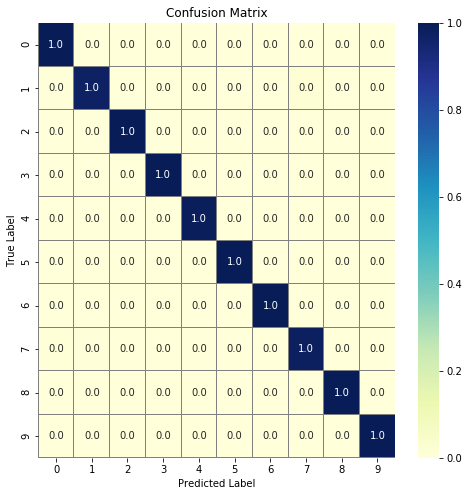

In [27]:
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# Convert validation observations to one hot vectors
print(Y_pred_classes)
Y_true = np.argmax(y_test,axis = 1)
print(Y_true)
# compute the confusion matrix
cm = confusion_matrix(Y_true, Y_pred_classes)
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
# plot the confusion matrix
f,ax = plt.subplots(figsize=(8, 8))
sns.heatmap(cm, annot=True, linewidths=0.01,cmap="YlGnBu",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show();

Importamos modelo

In [18]:
from keras.models import load_model
model = load_model('first_model.h5')

Listamos las etiquetas para saber identificar según la posición del mayor porcentaje de predicción del vector, a qué objeto pertenece.

In [33]:
class_names = list(dummies.columns)[:-1]
class_names

['cuchara',
 'cuchillo',
 'cuenco',
 'hervidor',
 'otro',
 'pelador',
 'rodillo',
 'tenedor',
 'tostadora',
 'vaso']

Testeamos sobre una imagen aleatoria del test

[5.3324041e-21 3.8626066e-28 8.5996122e-32 2.4183842e-28 6.4986634e-24
 4.5771053e-26 1.0000000e+00 1.2295979e-24 3.2685809e-24 1.9906558e-17]
cuchara: 0.0
cuchillo: 0.0
cuenco: 0.0
hervidor: 0.0
otro: 0.0
pelador: 0.0
rodillo: 1.0
tenedor: 0.0
tostadora: 0.0
vaso: 0.0
(1, 64, 64, 3)


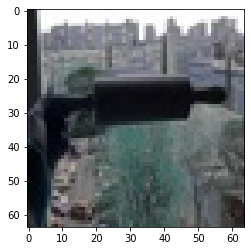

In [27]:
%matplotlib inline
import matplotlib.pyplot as plt
from PIL import Image

img = X_test[150]
pred = model.predict(np.expand_dims(img,axis=0))[0]
print(pred)
for obj in class_names:
    print(f'{obj}: {round(pred[class_names.index(obj)],2)}')
print(np.expand_dims(img,axis=0).shape)
plt.imshow(img);

In [32]:
X_test.shape

(5690, 64, 64, 3)